In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import csv
from pylab import *
from patsy import dmatrices

In [2]:
df01=pd.read_excel('wenke1ben.xls')

# 交换年份与响应变量湖北成绩的顺序以便后续操作

In [3]:
cols = list(df01)
cols.insert(0,cols.pop(cols.index('hubei')))

In [4]:
df01 = df01.loc[:,cols]

In [5]:
df010 = df01.drop(index = 0)
df011 = df01[0:1]

In [6]:
df010.iloc[:,0]

1     542
2     561
3     528
4     520
5     521
6     535
7     531
8     561
9     547
10    530
Name: hubei, dtype: int64

# 利用sklearn Ridge来实现岭回归

In [7]:
# 数据标准化
df_scaled = preprocessing.scale(df010)
df_scaled=pd.DataFrame(df_scaled)

# make response (ys) and predictors (xs)
xs = df_scaled.iloc[:,1:]
ys = df_scaled.iloc[:,0]

coef=[]
alphas = arange(0,10,0.1)

for a in alphas:
  ridgereg=Ridge(alpha=a)
  ridgereg.fit(xs,ys)
  coef.append(ridgereg.coef_)


C:\Users\dyw2000\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  


# 岭迹图

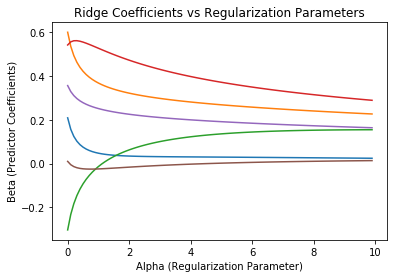

In [8]:
# Make plot of Beta as a function of Alpha（岭迹图）
fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(alphas,coef)
ax.set_xlabel('Alpha (Regularization Parameter)')
ax.set_ylabel('Beta (Predictor Coefficients)')
ax.set_title('Ridge Coefficients vs Regularization Parameters')
ax.axis('tight')
fig.savefig('coef_vs_alpha.png')

# 交叉验证选择合适的alpha，并输出此时的系数beta和 $𝑅^2$

In [9]:
###Selecting lambda
scaler=StandardScaler()
X_std=scaler.fit_transform(xs)

# 通过交叉验证来
regr_cv=RidgeCV(alphas=arange(0.1,10,0.1))
model_cv=regr_cv.fit(X_std,ys)

# 输出最佳的alpha
print(model_cv.alpha_)


0.2


In [10]:
# 输出最佳模型的系数
ridgereg=Ridge(alpha=1)
ridgereg.fit(xs,ys)
print(ridgereg.coef_)
ridgereg.score(X_std,ys)
print('\n')
print('R2 = ',ridgereg.score(X_std,ys))

[ 0.0474881   0.36831437 -0.01358262  0.52734488  0.25160538 -0.02441426]


R2 =  0.9750281389633726
